<a href="https://colab.research.google.com/github/ProbablyBenjamin/COMP5512022/blob/main/hepatitis_knn_decision_tree_miniproj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Downloading datasets to Google Collab**



In [ ]:
!pip3 install wget
import wget
url1 = "http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
hepatitis = wget.download(url1)
url2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff'
messidor_features = wget.download(url2)

**Import statements and seed**

In [ ]:
import numpy as np
from scipy.io import arff
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
#set random seed
np.random.seed(420)

**Cleaning Hepatitis Dataset**
Removed Protime column and data points with missing attributes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


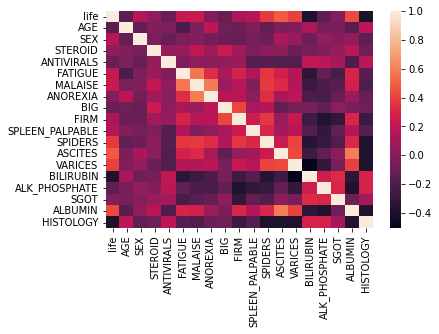

In [ ]:
import pandas as pd
# converting hepatitis dataset to a pandas dataframe
# removed the NA from 
hepatitisDataset =  pd.read_csv('hepatitis.data', sep=",", header = None)

hepatitisDataset.columns =  ["life", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "BIG", "FIRM", "SPLEEN_PALPABLE", "SPIDERS", 
          "ASCITES" , "VARICES", "BILIRUBIN", "ALK_PHOSPHATE", "SGOT", "ALBUMIN", "PROTIME", "HISTOLOGY" ]


hepatitisDataset = hepatitisDataset.drop("PROTIME", 1)
hepatitisDataset = hepatitisDataset[hepatitisDataset.life != "?"]
hepatitisDataset = hepatitisDataset[hepatitisDataset.AGE != "?"]
hepatitisDataset = hepatitisDataset[hepatitisDataset.SEX != "?"]
hepatitisDataset = hepatitisDataset[hepatitisDataset.STEROID != "?"]
hepatitisDataset = hepatitisDataset[hepatitisDataset.ANTIVIRALS != "?"]
hepatitisDataset = hepatitisDataset[hepatitisDataset.FATIGUE != "?"]
hepatitisDataset = hepatitisDataset[hepatitisDataset.MALAISE != "?"]
hepatitisDataset = hepatitisDataset[hepatitisDataset.ANOREXIA != "?"]
hepatitisDataset = hepatitisDataset[hepatitisDataset.BIG != "?"]
hepatitisDataset = hepatitisDataset[hepatitisDataset.FIRM != "?"]
hepatitisDataset = hepatitisDataset[hepatitisDataset.SPLEEN_PALPABLE != "?"]
hepatitisDataset = hepatitisDataset[hepatitisDataset.SPIDERS != '?']
hepatitisDataset = hepatitisDataset[hepatitisDataset.ASCITES != '?']
hepatitisDataset = hepatitisDataset[hepatitisDataset.VARICES != '?']
hepatitisDataset = hepatitisDataset[hepatitisDataset.BILIRUBIN != '?']
hepatitisDataset = hepatitisDataset[hepatitisDataset.ALK_PHOSPHATE != '?']
hepatitisDataset = hepatitisDataset[hepatitisDataset.SGOT != '?']
hepatitisDataset = hepatitisDataset[hepatitisDataset.ALBUMIN != '?']
#hepatitisDataset = hepatitisDataset[hepatitisDataset.PROTIME != '?']
hepatitisDataset = hepatitisDataset[hepatitisDataset.HISTOLOGY != '?']
hepatitisDataset = hepatitisDataset[hepatitisDataset.BILIRUBIN != '?']
hepatitisDataset = hepatitisDataset.astype(float)
sns.heatmap(hepatitisDataset.corr())
#hepatitisDataset = hepatitisDataset.drop("HISTOLOGY", 1)
#hepatitisDataset = hepatitisDataset.drop("BILIRUBIN", 1)


#normalizing hepatitis dataset
hepatitisDataset=(hepatitisDataset-hepatitisDataset.min())/(hepatitisDataset.max()-hepatitisDataset.min())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


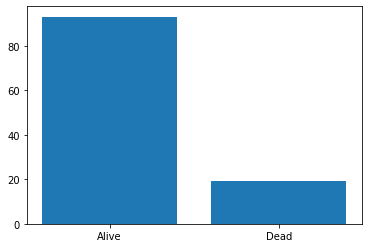

[0.32394366 1.         0.         1.         1.         1.
 1.         0.         1.         1.         1.         1.
 1.         0.15555556 0.21933086 0.00985222 0.59375    0.        ]
93 alive, 19 dead.


In [ ]:
target1 = hepatitisDataset['life']
hepatitisDataset = hepatitisDataset.drop('life', 1)
hepatitisDataset = hepatitisDataset.to_numpy()
target1 = target1.to_numpy()
classes= ( 'Alive','Dead')
alive = np.count_nonzero(target1 == 1)
dead = np.count_nonzero(target1 == 0)
array = [alive, dead]
plt.bar(np.arange(len(classes)), array)
plt.xticks([0,1], classes)
plt.show()
print(hepatitisDataset[0])

print(f"{alive} alive, {dead} dead.")

**Implementing KNN on Hepatitis Dataset**

In [ ]:
x, y = hepatitisDataset[:,:], target1.astype(int)                                 #slices the first two columns or features from the data
(N,D), C = x.shape, np.max(y)+1                                                  #np.max(y)+1 because y has 0,1,2 as values but we need to show that there are 3 classes so,
                                                                                    #np.max(y) = 2 and np.max(y)+1 = 3

print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

np.random.seed(1234)
inds = np.random.permutation(N)                                                     #generates an indices array from 0 to N-1 and permutes it 

#split the dataset into train and test 
# x_train, y_train = x[:100], y[:100]                                              #order needs to be shuffled else we would Always get only two classes.
# x_test, y_test = x[100:], y[100:]
# print(y_test)

#split the dataset into train and test
bound = (int) (N*0.8) #80/20 split
x_train, y_train = x[inds[:bound]], y[inds[:bound]]
x_test, y_test = x[inds[bound:]], y[inds[bound:]]




instances (N) 	 112 
 features (D) 	 18 
 classes (C) 	 2


KNN CLASS GIVEN TO US

In [ ]:
#define the metric we will use to measure similarity
#if the input shapes are [1,N1,F] and [N2,1,F] then output shape is [N2,N1]
#as numpy supports broadcasting with arithmetic operations
#for more on numpy broadcasting refer to: https://numpy.org/doc/stable/user/basics.broadcasting.html   
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2,axis = -1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn                                                    #we need to use self because the parameters would be stored in variables 
                                                                                  #on the stack and would be discarded when the init method goes out of scope
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        
        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
                
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        # print("The shape of the distances is", distances.shape)                          
        #When operating on two arrays, NumPy compares their shapes element-wise. 
        #It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when: they are equal, or one of them is 1

        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K                                                          #nd you just divided by K so that we scale the value from zero to 1.
        return y_prob, knns

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#oversample = SMOTE()
#x_train, y_train = oversample.fit_resample(x_train, y_train)
#class_balance = pd.Series(y_train).value_counts().plot.bar()
#class_balance.set_title("Outcome ytrain (SMOTE)")
#plt.gca().set_xticklabels(['Death','Alive']);
#class_balance.figure.savefig('class_balance.png')

In [ ]:
model = KNN(K=22, dist_fn= euclidean)

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)

#To get hard predictions by choosing the class with the maximum probability


y_pred = np.argmax(y_prob,axis=-1)                                                #This returns the indeces of the largest element in the array
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]

print(f'accuracy is {accuracy*100:.1f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)



knns shape: (23, 22)
y_prob shape: (23, 2)
accuracy is 73.9.


KNN Experiments:

In [ ]:
from sklearn.model_selection import cross_val_score #We can't use SKlearn i thought
from sklearn.neighbors import KNeighborsClassifier
lrange=list(range(1,20))
scores1 = []
scores2 = []
scores3 = []
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2,axis = -1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
for k in lrange:
  model1 = KNN(K=k, dist_fn= euclidean)
  model2 = KNN(K=k, dist_fn= manhattan)
  y_prob1, knns1 = model1.fit(x_train, y_train).predict(x_test)
  y_pred1 = np.argmax(y_prob1,axis=-1)                                                #This returns the indeces of the largest element in the array
  accuracy1 = np.sum(y_pred1 == y_test)/y_test.shape[0]
  y_prob2, knns2 = model2.fit(x_train, y_train).predict(x_test)
  y_pred2 = np.argmax(y_prob2,axis=-1)                                                #This returns the indeces of the largest element in the array
  accuracy2 = np.sum(y_pred2 == y_test)/y_test.shape[0]
  scores1.append(accuracy1)
  scores2.append(accuracy2)

optimal_k1 = lrange[scores1.index(max(scores1))]
optimal_k2 = lrange[scores2.index(max(scores2))]
print("The optimal number of neighbors euc is %d" % optimal_k1)
print("The optimal number of neighbors man is %d" % optimal_k2)
print(scores1)
print(scores2)
#print("The optimal score is %.2f" % max(scores))


The optimal number of neighbors euc is 3
The optimal number of neighbors man is 6
[0.782608695652174, 0.782608695652174, 0.8260869565217391, 0.8260869565217391, 0.782608695652174, 0.8260869565217391, 0.8260869565217391, 0.8260869565217391, 0.7391304347826086, 0.782608695652174, 0.782608695652174, 0.782608695652174, 0.7391304347826086, 0.782608695652174, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086]
[0.782608695652174, 0.782608695652174, 0.8260869565217391, 0.8260869565217391, 0.8260869565217391, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.7391304347826086, 0.8260869565217391, 0.782608695652174, 0.782608695652174, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086]


Data structure for Decision tree


In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

Greedy Splitting


In [ ]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

Cost Functions

In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

Decision Tree Class

In [ ]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit2(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict2(self, data_test):
        pass

Fit Function

In [ ]:
def fit2(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit2_tree(self.root)
    return self

def _fit2_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit2_tree()
    self._fit2_tree(left)
    self._fit2_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit2 = fit2
DecisionTree._fit2_tree = _fit2_tree

New Predictions

In [ ]:
def predict2(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict2 = predict2

Experiments

In [ ]:
tree = DecisionTree(max_depth=1, cost_fn=cost_misclassification)

x, y = hepatitisDataset[:,:], target1.astype(int)

print(x,y)
(num_instances, num_features), num_classes = x.shape, np.max(y)+1
np.random.seed(1234)
inds = np.random.permutation(num_instances)

#fitting to tree
probs_test = tree.fit2(x_train, y_train).predict2(x_test)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]

print(f'accuracy is {accuracy*100:.1f}.')






[[0.32394366 1.         0.         ... 0.00985222 0.59375    0.        ]
 [0.6056338  0.         0.         ... 0.06896552 0.4375     0.        ]
 [1.         0.         1.         ... 0.04433498 0.59375    0.        ]
 ...
 [0.76056338 0.         0.         ... 0.01477833 0.625      1.        ]
 [0.64788732 1.         0.         ... 0.01231527 0.625      1.        ]
 [0.50704225 0.         1.         ... 0.01231527 0.3125     1.        ]] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1
 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1
 0]
accuracy is 69.6.


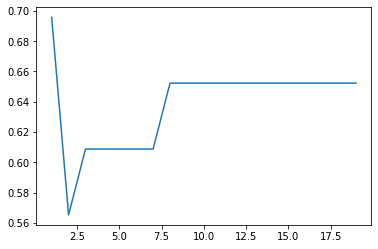

The optimal tree depth is 1


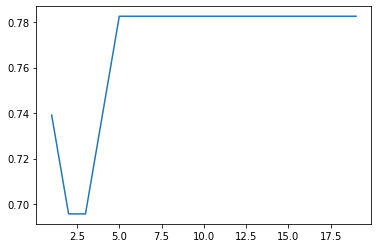

The optimal tree depth is 5


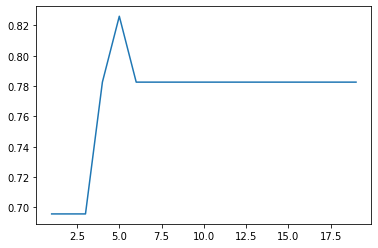

The optimal tree depth is 5


In [ ]:
cost_fns = [cost_misclassification, cost_entropy, cost_gini_index]
for j in range(3):
  lrange=list(range(1,20))
  scores = []
  for k in lrange:
    
    tree = DecisionTree(max_depth=k, cost_fn=cost_fns[j])
    (num_instances, num_features), num_classes = x.shape, np.max(y)+1
    probs_test = tree.fit2(x_train, y_train).predict2(x_test)
    y_pred = np.argmax(probs_test,1)
    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    scores.append(accuracy)

  optimal_k = lrange[scores.index(max(scores))]
  plt.plot(lrange, scores)
  plt.show()
  print("The optimal tree depth is %d" % optimal_k)

**Implementing Decision Tree Algorithm**

Things we can play around with:

Worth-splitting subroutine
- minimum leaf size, max tree depth 